In [56]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [58]:
df= pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")

In [59]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [60]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [61]:
df.columns= ['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award']

In [62]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [64]:
df.Award.value_counts() 

0    2518
1    1481
Name: Award, dtype: int64

In [65]:
# as values of 0 and 1 are having almost same proportions it cab ne considered as balanaced data set

In [66]:
df1= df.drop(["ID", "Award"], axis=1)
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [67]:
std_df1=StandardScaler()
std_df1=std_df1.fit_transform(df1)
std_df1.shape

(3999, 10)

In [68]:
# within-cluster sum-of-squares 
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)  
    kmeans.fit(std_df1)
    wcss.append(kmeans.inertia_)

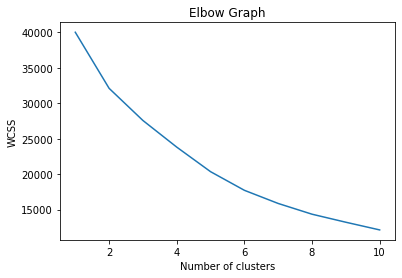

In [69]:
# Getting Elbow graph for choosing no. of clusters
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
from sklearn.metrics import silhouette_score

k_list= [2,3,4,5,6,7,8,9,10]  # list should start from 2

for no_clusters in k_list:
    clusters = KMeans(n_clusters=no_clusters, random_state=0)
    cluster_labels = clusters.fit_predict(std_df1)
    silhouette_score1= silhouette_score(std_df1, cluster_labels)
    print(f"For n_clusters {no_clusters} The average silhouette_score is {silhouette_score1}")

For n_clusters 2 The average silhouette_score is 0.35826638416515033
For n_clusters 3 The average silhouette_score is 0.330411996315242
For n_clusters 4 The average silhouette_score is 0.3322237914091003
For n_clusters 5 The average silhouette_score is 0.34818137095348617
For n_clusters 6 The average silhouette_score is 0.35990130799241493
For n_clusters 7 The average silhouette_score is 0.2590199600553473
For n_clusters 8 The average silhouette_score is 0.26819091939498757
For n_clusters 9 The average silhouette_score is 0.2821304457163712
For n_clusters 10 The average silhouette_score is 0.27039271048441627


In [71]:
# So Slecting 6 clusters with silhouette_score is : 0.359

# Using standardized data without PCA

In [72]:
clustor= KMeans( n_clusters=6, random_state=0)
clustor.fit(std_df1)
cluster_labels=clustor.predict(std_df1)
clustor.cluster_centers_

array([[-0.30913616, -0.12409091, -0.65032695, -0.09824189, -0.06064281,
        -0.53817535, -0.53091497, -0.17804012, -0.19229445, -0.20263326],
       [ 0.41584979, -0.11786467,  1.17555244, -0.09824189, -0.05505774,
         0.86991501,  0.74002288, -0.09878192, -0.10604227,  0.34353964],
       [ 0.43393737,  6.85291656, -0.01860659, -0.09824189, -0.06276658,
         0.07929303,  0.07322846,  0.36123467,  0.39754351, -0.11803558],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261],
       [ 1.13326381,  0.42277988,  0.14737381, -0.09824189, -0.06276658,
         0.66638195,  1.70545548,  3.79529835,  4.04907076,  0.27424968],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398]])

In [73]:
df2=df.copy()

In [74]:
df2["Cust_lables"]=cluster_labels

In [75]:
df2.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cust_lables
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


<AxesSubplot:xlabel='Cust_lables', ylabel='count'>

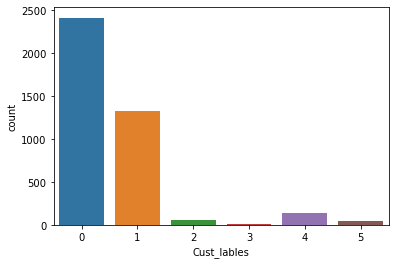

In [76]:
sns.countplot(x="Cust_lables", data=df2)

# USING standardized data With PCA

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca=PCA(n_components=0.97, random_state=0)
pca_data=pca.fit_transform(std_df1)

In [79]:
pca_data

array([[-1.30259849, -0.06672133, -0.83747912, ...,  1.29486574,
        -0.63453959,  0.31684132],
       [-1.28625898, -0.06339178, -0.7842588 , ...,  1.24935537,
        -0.72120272,  0.24497869],
       [-1.0325221 , -0.13688067, -0.81075855, ...,  1.25188529,
        -0.59444208,  0.12847069],
       ...,
       [-0.23455655, -0.57857909,  0.55814645, ..., -1.01381263,
         0.65211943,  0.49091492],
       [-1.52141921,  0.72682723,  0.39141878, ..., -0.33635817,
         0.79154696,  0.41323792],
       [-1.96207193,  0.40994447,  0.49043906, ..., -0.47367864,
         0.41666697,  0.43238182]])

In [80]:
(pca.explained_variance_ratio_)*100

array([30.50115845, 17.27406665, 10.5087073 , 10.07979485,  9.60188179,
        9.05617078,  6.71532505,  3.62968484])

In [81]:
np.cumsum((pca.explained_variance_ratio_)*100)

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

In [82]:
model_pca_std =KMeans( n_clusters=6, random_state=0)
clust_label_pca=model_pca_std.fit_predict(pca_data)

In [83]:
print("for 6 clusters the silhouette score is", silhouette_score(pca_data, clust_label_pca))

for 6 clusters the silhouette score is 0.3662869252330996


In [84]:
df3=df.copy()
df3["Clust_label_PCA"]=clust_label_pca

<AxesSubplot:xlabel='Clust_label_PCA', ylabel='count'>

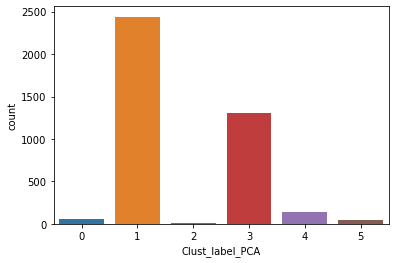

In [85]:
sns.countplot(x="Clust_label_PCA", data=df3)

# Using minmax scalar to fit model without PCA

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
min_scaled= MinMaxScaler()
min_data=min_scaled.fit_transform(df1)

In [88]:
from sklearn.metrics import silhouette_score

k_list= [2,3,4,5,6,7,8,9, 10]  # list should start from 2

for no_clusters in k_list:
    clusters2 = KMeans(n_clusters=no_clusters, random_state=0)
    cluster_labels = clusters2.fit_predict(min_data)
    silhouette_score2= silhouette_score(min_data, cluster_labels)
    print(f"For n_clusters {no_clusters} The average silhouette_score is {silhouette_score2}")

For n_clusters 2 The average silhouette_score is 0.4811541557645117
For n_clusters 3 The average silhouette_score is 0.40383644873633734
For n_clusters 4 The average silhouette_score is 0.37660565218548464
For n_clusters 5 The average silhouette_score is 0.37551422811409824
For n_clusters 6 The average silhouette_score is 0.32570076596164316
For n_clusters 7 The average silhouette_score is 0.33435820396532306
For n_clusters 8 The average silhouette_score is 0.34194667231222187
For n_clusters 9 The average silhouette_score is 0.3368736245703591
For n_clusters 10 The average silhouette_score is 0.3429863162867204


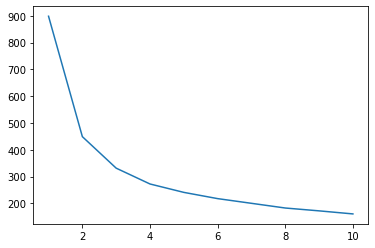

In [89]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)  
    kmeans.fit(min_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

In [90]:
# from above we can select 4 clusters with silhouette_score 0.3766

In [91]:
model_minmax=KMeans(n_clusters=4, random_state=0)
minmax_custlabels= model_minmax.fit_predict(min_data)

In [92]:
df4= df.copy()
df4["minmax_custlabels"]=minmax_custlabels

<AxesSubplot:xlabel='minmax_custlabels', ylabel='count'>

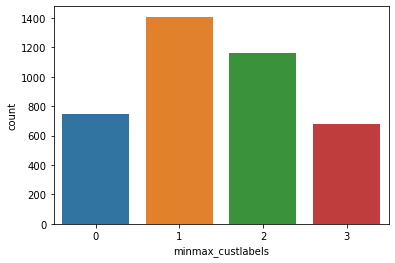

In [93]:
sns.countplot(x="minmax_custlabels", data=df4)

# Using minmax scalar to fit model with PCA

In [94]:
pca_minmax=PCA(n_components=0.97, random_state=0)
pca_minmax_data=pca_minmax.fit_transform(min_data)
pca_minmax_data.shape

(3999, 7)

In [95]:
np.cumsum(pca_minmax.explained_variance_ratio_*100)

array([60.47067269, 85.45465886, 90.50651003, 92.97634882, 95.08801991,
       96.66653954, 98.01579663])

In [96]:
from sklearn.metrics import silhouette_score

k_list= [2,3,4,5,6,7,8,9, 10]  # list should start from 2

for no_clusters in k_list:
    clusters3 = KMeans(n_clusters=no_clusters, random_state=0)
    cluster_labels = clusters3.fit_predict(pca_minmax_data)
    silhouette_score3= silhouette_score(pca_minmax_data, cluster_labels)
    print(f"For n_clusters {no_clusters} The average silhouette_score is {silhouette_score3}")

For n_clusters 2 The average silhouette_score is 0.48750783224997685
For n_clusters 3 The average silhouette_score is 0.4131167964696441
For n_clusters 4 The average silhouette_score is 0.3863478428923393
For n_clusters 5 The average silhouette_score is 0.386206444390964
For n_clusters 6 The average silhouette_score is 0.33805691021412376
For n_clusters 7 The average silhouette_score is 0.3476688557698642
For n_clusters 8 The average silhouette_score is 0.3555926858146624
For n_clusters 9 The average silhouette_score is 0.36280835697230246
For n_clusters 10 The average silhouette_score is 0.3644597257251089


In [97]:
model_pca_minmax=KMeans(n_clusters=4, random_state=0)
pca_minmax_labels=model_pca_minmax.fit_predict(pca_minmax_data)

In [98]:
df5=df.copy()
df5["pca_minmax_labels"]=pca_minmax_labels

<AxesSubplot:xlabel='pca_minmax_labels', ylabel='count'>

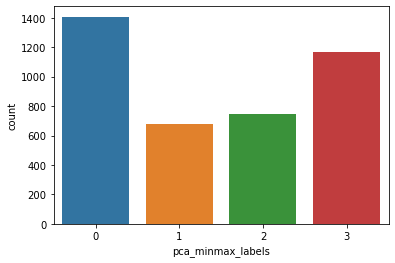

In [99]:
sns.countplot(x="pca_minmax_labels", data=df5)

# It can be seen from above comparison that PCA with Minmaxscaler data
# gives the best silhouette_score of  0.3863 , with 4 clusters